In [1]:
import pandas as pd
from bs4 import BeautifulSoup

In [9]:
with open(r'D:\EMAT_22110\Projects\AEJMC21 Attendees List.txt', encoding = 'utf-8') as f:
    attendee_list = f.read()

In [4]:
print(attendee_list)

<_io.TextIOWrapper name='D:\\EMAT_22110\\Projects\\AEJMC21 Attendees List.txt' mode='r' encoding='cp1252'>


In [11]:
attendee_soup = BeautifulSoup(attendee_list, 'html.parser')

In [14]:
names = [x.text.strip() for x in attendee_soup.find_all(name='a', attrs={'data-cvent-id':'attendee-list-item-name'})]

In [16]:
names[0:10]

['Aaron Atkins',
 'Aaron Chimbel',
 'Abby Hendricks',
 'Abdul Wahab Gibrilu',
 'Abdulaziz Alowais',
 'Abhijit Mazumdar',
 'Abhinav Aima',
 'Adina Schneeweis',
 'Adriana Mucedola',
 'Adriane Grumbein']

In [25]:
firsts = []
lasts = []
for i in names:
    splits = i.split(' ')
    firsts.append(splits[0])
    lasts.append(splits[-1])

In [26]:
firsts[0:10]

['Aaron',
 'Aaron',
 'Abby',
 'Abdul',
 'Abdulaziz',
 'Abhijit',
 'Abhinav',
 'Adina',
 'Adriana',
 'Adriane']

In [28]:
len(firsts)

1966

In [27]:
lasts[0:10]

['Atkins',
 'Chimbel',
 'Hendricks',
 'Gibrilu',
 'Alowais',
 'Mazumdar',
 'Aima',
 'Schneeweis',
 'Mucedola',
 'Grumbein']

In [29]:
len(lasts)

1966

In [19]:
companies = [x.text.strip() for x in attendee_soup.find_all(name='div', attrs={'data-cvent-id':'attendee-list-item-company'})]

In [20]:
companies[0:10]

['Weber State University',
 'St. Bonaventure University',
 'UT Austin',
 'The Chinese University of Hong Kong',
 'The University of Alabama',
 'Park University',
 'Penn State New Kensington',
 'Oakland University',
 'Syracuse University',
 'University of Kentucky']

In [21]:
len(names)

1966

In [22]:
len(companies)

1966

In [30]:
at_df = pd.DataFrame({'name': names, 'first': firsts, 'last': lasts, 'university': companies})

In [31]:
at_df

,name,first,last,university
0,Aaron Atkins,Aaron,Atkins,Weber State University
1,Aaron Chimbel,Aaron,Chimbel,St. Bonaventure University
2,Abby Hendricks,Abby,Hendricks,UT Austin
3,Abdul Wahab Gibrilu,Abdul,Gibrilu,The Chinese University of Hong Kong
4,Abdulaziz Alowais,Abdulaziz,Alowais,The University of Alabama
...,...,...,...,...
1961,Zhuling Liu,Zhuling,Liu,University at Buffalo
1962,Zifei Chen,Zifei,Chen,University of San Francisco
1963,Ziwei Zhang,Ziwei,Zhang,The Chinese University of Hong Kong
1964,ZIYANG GONG,ZIYANG,GONG,University of Illinois at Urbana-Champaign


In [32]:
at_df['first'].value_counts()

David        20
John         19
Michael      17
Jennifer     15
Brian        11
             ..
Dzmitry       1
Martha        1
Frankline     1
Indah         1
Gisele        1
Name: first, Length: 1291, dtype: int64

In [60]:
first_counts = at_df['first'].value_counts()

In [94]:
top_firsts = first_counts.loc[first_counts > 5]

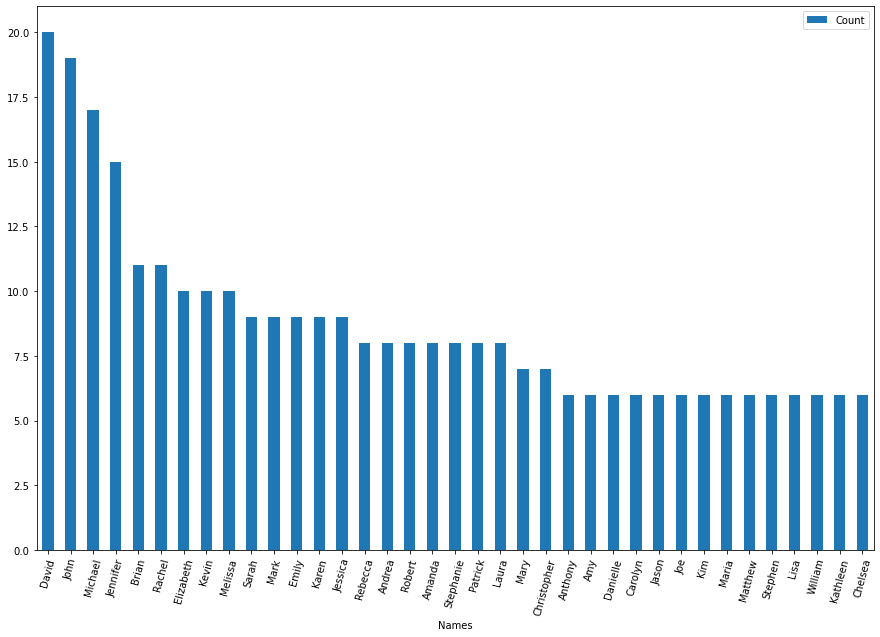

In [95]:
top_firsts_df = pd.DataFrame({'Names':top_firsts.index, 'Count':top_firsts})
ax = top_firsts_df.plot.bar(x='Names', y='Count', rot=75, figsize=(15,10))

In [55]:
at_df['name'].value_counts()

Donna Halper       2
Amara Aguilar      2
Angeline Taylor    2
David Dowling      2
Shafiqur Rahman    2
                  ..
Carlina DiRusso    1
Naeemah Clark      1
milan ismangil     1
Edmund Lee         1
Pam Parry          1
Name: name, Length: 1956, dtype: int64

In [56]:
at_df['name'].value_counts() > 1

False

In [49]:
at_df[at_df['name'] == 'Donna Halper']

,name,first,last,university,lower_uni
428,Donna Halper,Donna,Halper,Lesley University,lesley university
429,Donna Halper,Donna,Halper,"Lesley University, Cambridge MA","lesley university, cambridge ma"


In [50]:
at_df[at_df['name'] == 'Amara Aguilar']

,name,first,last,university,lower_uni
63,Amara Aguilar,Amara,Aguilar,University of Southern Caliifornia,university of southern caliifornia
64,Amara Aguilar,Amara,Aguilar,University of Southern Caliifornia,university of southern caliifornia


In [34]:
at_df['last'].value_counts()

Lee              29
Kim              29
Yang             17
Zhang            17
Wang             14
                 ..
Himelboim         1
Glasser           1
Stephenson        1
Scheinfeld        1
Mudiyanselage     1
Name: last, Length: 1534, dtype: int64

In [58]:
at_df['university'].value_counts()

University of Florida                           50
University of Maryland                          31
University of South Carolina                    29
Michigan State University                       27
Syracuse University                             25
                                                ..
doctoral student, Ohio University                1
University Of NEW Mexico                         1
school of communication, Shenzhen University     1
Assistant Professor, Syracuse University         1
Research Associate, Cardiff University           1
Name: university, Length: 905, dtype: int64

In [101]:
uni_counts = at_df['university'].value_counts()
top_unis = uni_counts.loc[uni_counts > 13]

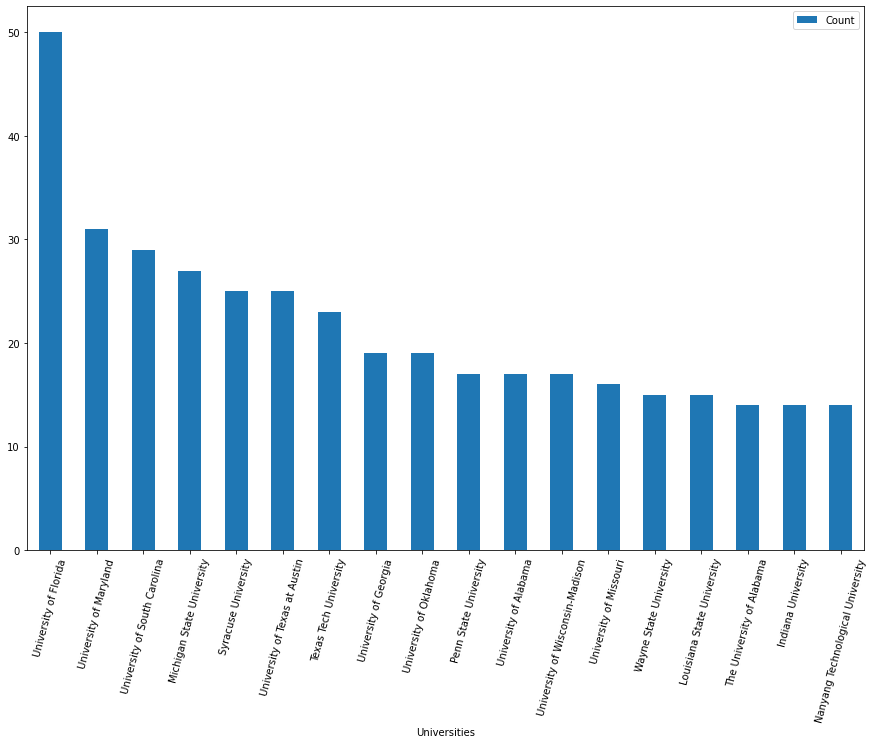

In [102]:
top_uni_df = pd.DataFrame({'Universities':top_unis.index, 'Count':top_unis})
ax = top_uni_df.plot.bar(x='Universities', y='Count', rot=75, figsize=(15,10))

In [38]:
at_df['university'].value_counts()[-50:-1]

PhD Student, School of Journalism and Media (UT Austin)                                   1
BYU                                                                                       1
Doha Institute for Graduate Studies                                                       1
University of Florida College of Journalism and Communications                            1
The University of Texas                                                                   1
Interim Executive Director/ Conference Manager, AEJMC                                     1
Mediaplus Consultancy                                                                     1
Winthrop University                                                                       1
Christopher T. Assaf                                                                      1
University of Baltimore School of Law                                                     1
Syracuse U                                                                      

In [42]:
at_df['lower_uni'] = [x.lower() for x in at_df['university']]

In [44]:
uni_freqs = at_df['lower_uni'].value_counts()

In [47]:
uni_freqs.tail(50)

museum of public relations                                               1
g d goenka university                                                    1
iium                                                                     1
rider university                                                         1
univeresity of tennessee, knoxville                                      1
school of journalism and mass communication                              1
joan ganz cooney center at sesame workshop                               1
school of journalism, the university of arizona                          1
penn state beaver                                                        1
graduate school of journalism, university of california, berkeley usa    1
austonia                                                                 1
school of journalism and communication, the chinese u of hong kong       1
uw-eau claire (emeritus)                                                 1
washington and lee univer